In [1]:
import numpy as np
import pandas as pd
from numpy import random
from matplotlib import pylab
import itertools

In [2]:
m = 5
repl = 3
n = 50
timepoints = np.linspace(0, 1, m)
data = np.zeros((repl*m, n))
features = np.arange(n)
for i in range(m):
    for j in range(repl):
        x1_i = np.abs(np.exp(-(features)**2/10**2) + 0.05*np.random.randn(n))
        x2_i = np.abs(np.exp(-(features-n)**2/10**2) + 0.05*np.random.randn(n))
        data[i*repl+j, :] = (m-float(i))/m * x1_i + float(i)/m * x2_i

get_id = lambda ti, replj: f"T{ti}R{replj}"
df1 = pd.DataFrame(data=data, index=[get_id(i,j) for i,j in itertools.product(range(len(timepoints)), range(repl))], columns=features) 
df1.insert(0, "Timepoint", sum(list([repl * [ti,] for ti in timepoints]), []))

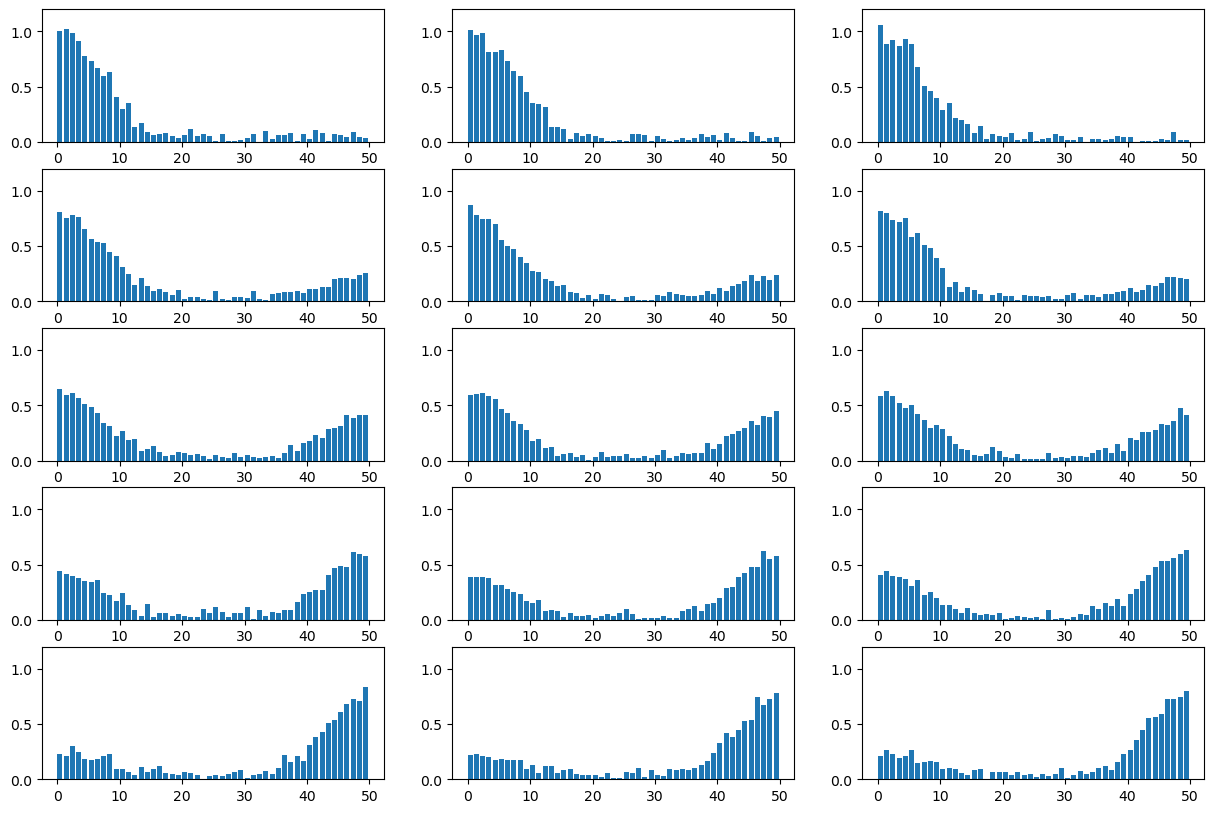

In [3]:
fig, axs = pylab.subplots(m, repl, figsize=(15,10))
for i in range(m):
    for j in range(repl):
        axs[i,j].bar(features, data[i*repl+j, :], align='edge')
        axs[i,j].set_ylim(0,1.2)

In [4]:
df1.to_csv('exampledata1.csv', sep=',', index_label="Sample")

## 2nd example data set: two independent movements

In [5]:
m = 5
repl = 3
n = 50
timepoints = np.linspace(0, 1, m)
data = np.zeros((repl*m, n))
features = np.arange(n)
for i in range(m):
    for j in range(repl):
        x1_i = np.abs(np.exp(-(features)**2/10**2) + 0.05*np.random.randn(n))
        x2_i = np.abs(np.exp(-(features-n)**2/10**2) + 0.05*np.random.randn(n))
        x3_i = np.abs(0.5*np.exp(-(features-n/2)**2/5**2) + 0.05*np.random.randn(n))
        data[i*repl+j, :] = (m-float(i))/m * x1_i + float(i)/m * x2_i + np.abs(np.cos(float(i)/m*4*np.pi)) * x3_i

get_id = lambda ti, replj: f"T{ti}R{replj}"
df2 = pd.DataFrame(data=data, index=[get_id(i,j) for i,j in itertools.product(range(len(timepoints)), range(repl))], columns=features) 
df2.insert(0, "Timepoint", sum(list([repl * [ti,] for ti in timepoints]), []))

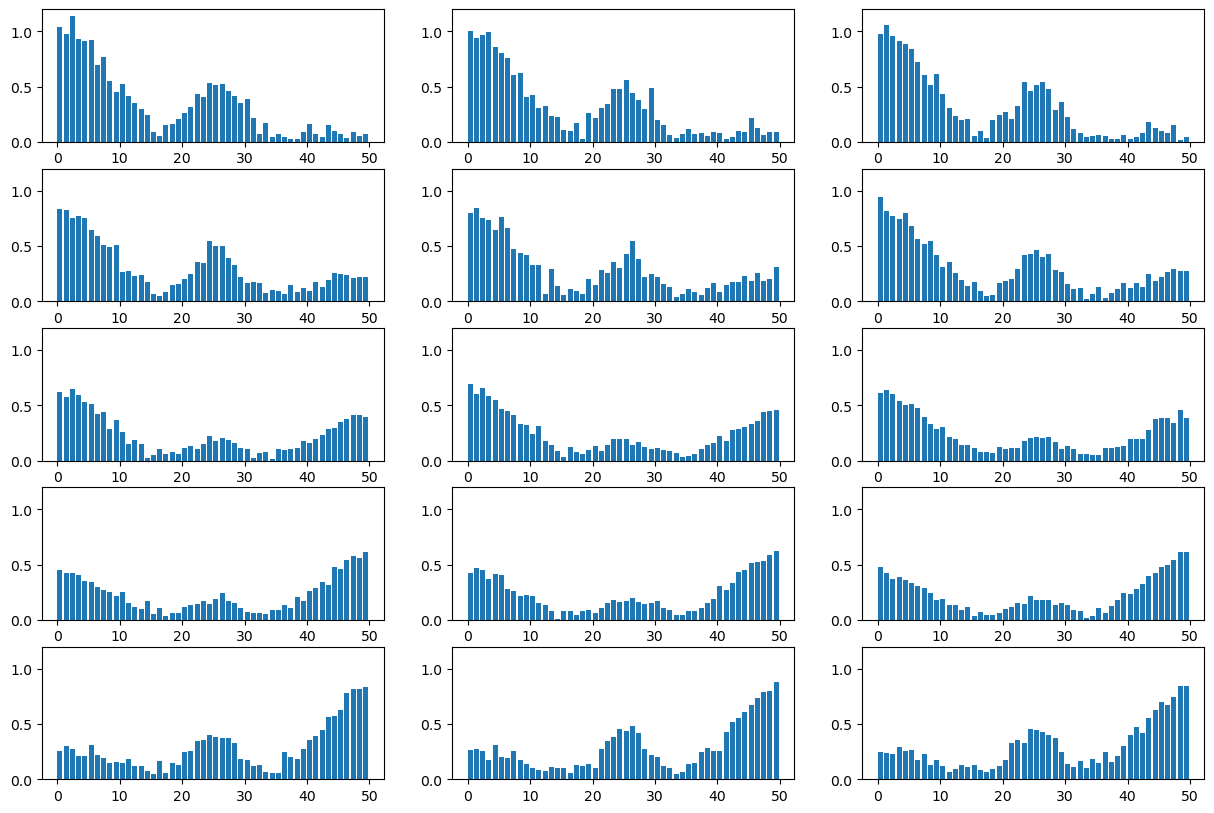

In [6]:
fig, axs = pylab.subplots(m, repl, figsize=(15,10))
for i in range(m):
    for j in range(repl):
        axs[i,j].bar(features, data[i*repl+j, :], align='edge')
        axs[i,j].set_ylim(0,1.2)

In [7]:
df2.to_csv('exampledata2.csv', sep=',', index_label="Sample")

## Dataset with two conditions

Let's combine the two previous datasets so that we also have an example with two different conditions "a" and "b".

For more fun with testing, we also scramble the dataframe rows.

In [33]:
dfa = df1.copy()
dfa.insert(0, "Sample", ["a" + i for i in df1.index])
dfa.insert(1, "Condition", "a")
# dfa.set_index("Sample", inplace=True, drop=True)

In [34]:
dfb = df2.copy()
dfb.insert(0, "Sample", ["b" + i for i in df1.index])
dfb.insert(1, "Condition", "b")
# dfb.set_index("Sample", inplace=True, drop=True)

In [35]:
df = dfa.merge(dfb, how="outer")
df.set_index("Sample", inplace=True, drop=True)
df

,Condition,Timepoint,0,1,2,3,4,5,6,7,...,40,41,42,43,44,45,46,47,48,49
Sample,,,,,,,,,,,,,,,,,,,,,
aT0R0,a,0.00,1.000774,1.022492,0.988288,0.913093,0.778521,0.734178,0.672347,0.595254,...,0.030399,0.109580,0.077483,0.012780,0.072528,0.062764,0.044036,0.088322,0.042608,0.037762
aT0R1,a,0.00,1.008382,0.970551,0.982960,0.812575,0.812171,0.827395,0.736240,0.638790,...,0.021904,0.082116,0.035272,0.010958,0.005182,0.090298,0.052198,0.010769,0.038401,0.047446
aT0R2,a,0.00,1.059388,0.883211,0.922625,0.866538,0.933068,0.888025,0.681157,0.504433,...,0.044635,0.002701,0.005989,0.006343,0.009671,0.023210,0.017163,0.089133,0.020438,0.016035
aT1R0,a,0.25,0.807937,0.749491,0.776740,0.762553,0.657356,0.567324,0.533255,0.525237,...,0.109658,0.110335,0.132841,0.132628,0.206331,0.214621,0.208982,0.203132,0.241186,0.253937
aT1R1,a,0.25,0.875218,0.781884,0.742667,0.740283,0.694851,0.554243,0.500526,0.470637,...,0.117115,0.093810,0.135792,0.159591,0.185974,0.234537,0.185489,0.233614,0.191626,0.242422
aT1R2,a,0.25,0.813807,0.794552,0.739624,0.715714,0.749517,0.583339,0.616479,0.509308,...,0.118793,0.084636,0.101273,0.146054,0.139967,0.170014,0.216953,0.218278,0.211041,0.198984
aT2R0,a,0.50,0.645140,0.590286,0.610354,0.566043,0.511908,0.482949,0.426382,0.339170,...,0.181312,0.234669,0.205456,0.290063,0.290868,0.312657,0.411430,0.386546,0.411612,0.410084
aT2R1,a,0.50,0.595784,0.605123,0.608791,0.587488,0.556685,0.468577,0.429794,0.361283,...,0.149243,0.221486,0.238839,0.269734,0.297359,0.358423,0.324551,0.401306,0.394384,0.451104
aT2R2,a,0.50,0.587388,0.633882,0.587074,0.516718,0.478187,0.503968,0.425493,0.363365,...,0.203307,0.185489,0.258553,0.256283,0.272655,0.327235,0.326666,0.356884,0.476731,0.415795


In [37]:
df = df.sample(frac=1).sample(frac=1, axis=1)
c1 = df.pop("Timepoint")
c2 = df.pop("Condition")
df.insert(0, "Timepoint", c1)
df.insert(0, "Condition", c2)
df

,Condition,Timepoint,10,43,2,0,16,30,33,48,...,21,45,36,32,19,35,5,4,26,20
Sample,,,,,,,,,,,,,,,,,,,,,
bT2R0,b,0.50,0.257344,0.289503,0.647989,0.616976,0.106462,0.104393,0.076571,0.408687,...,0.133770,0.352858,0.096476,0.067347,0.060626,0.107664,0.513734,0.527660,0.205502,0.114881
bT1R1,b,0.25,0.330390,0.177336,0.749121,0.800879,0.114777,0.219097,0.039625,0.205628,...,0.285327,0.182538,0.083225,0.133174,0.201702,0.108201,0.758111,0.640626,0.541161,0.143730
bT3R2,b,0.75,0.185927,0.401784,0.368105,0.476529,0.075384,0.130877,0.018291,0.610398,...,0.119864,0.479793,0.065297,0.078795,0.065155,0.110591,0.331780,0.359129,0.180917,0.101443
aT3R2,a,0.75,0.131809,0.409069,0.397625,0.407366,0.042362,0.005709,0.049185,0.599002,...,0.015108,0.531812,0.154003,0.054479,0.064682,0.102755,0.307679,0.373001,0.005647,0.009758
aT4R2,a,1.00,0.089340,0.556364,0.226878,0.206623,0.088952,0.008604,0.051686,0.748114,...,0.038747,0.588322,0.120476,0.072652,0.062135,0.106148,0.265417,0.213491,0.045823,0.063276
aT4R0,a,1.00,0.095929,0.508174,0.299328,0.230747,0.118328,0.011352,0.076791,0.706435,...,0.059833,0.610235,0.221321,0.047302,0.040357,0.105154,0.176116,0.184891,0.032653,0.069733
bT0R0,b,0.00,0.525000,0.151803,1.137838,1.040662,0.058740,0.391012,0.170108,0.050252,...,0.320047,0.075622,0.044317,0.069183,0.205697,0.068180,0.924488,0.916636,0.524885,0.264774
bT0R2,b,0.00,0.434180,0.183616,0.959110,0.978471,0.095850,0.228419,0.041721,0.016670,...,0.209877,0.098066,0.050949,0.078302,0.245241,0.060566,0.836569,0.884298,0.544826,0.268028
bT4R2,b,1.00,0.122060,0.555449,0.228527,0.249398,0.085889,0.140418,0.100781,0.841715,...,0.330007,0.698259,0.248047,0.166558,0.123691,0.151106,0.261848,0.256750,0.425623,0.174448


In [38]:
df.to_csv('exampledata3.csv', sep=',', index_label="Sample")